In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
df =pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Preprocessing

#Embarked have 2 , very few missing values - replace with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



#extract deck from first lette of cabin 

df['Deck'] = df['Cabin'].str[0]





In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck           687
dtype: int64

In [9]:
#handling missing age

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
features_for_age = ['Age','Fare','Pclass','SibSp','Parch']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_age])

# Impute
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(df_scaled)

# Inverse scale to original space
df_imputed = scaler.inverse_transform(imputed_scaled)

# Update only 'Age' in original df
df['Age'] = df_imputed[:, features_for_age.index('Age')]

In [10]:

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck           687
dtype: int64

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Deck            object
dtype: object

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.958215,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.688887,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Deck            object
dtype: object

In [15]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

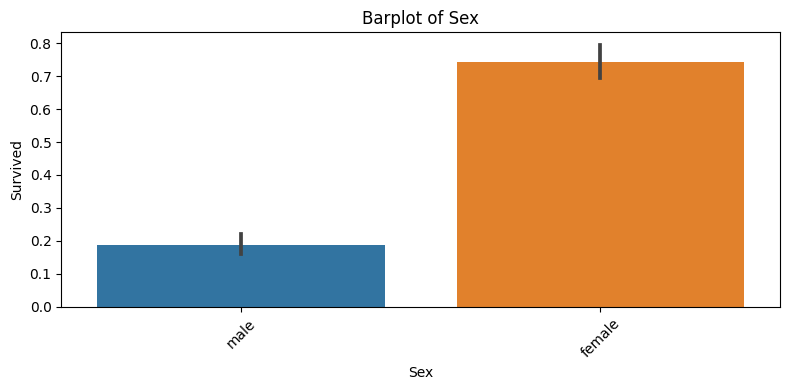

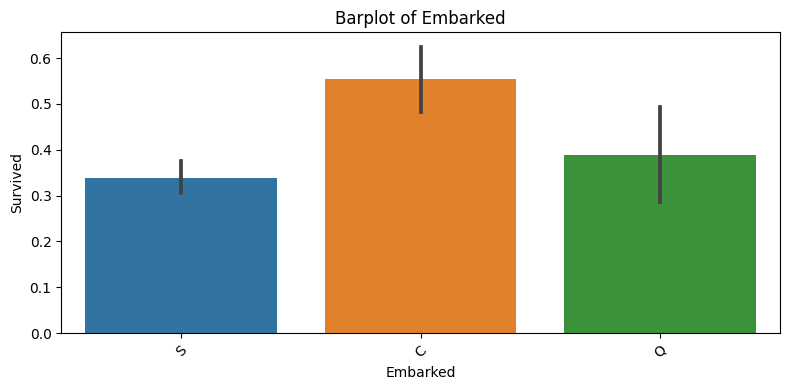

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['Sex','Embarked']:
    
        plt.figure(figsize=(8,4))
        sns.barplot(x=col,y='Survived',data = df)
        plt.title(f'Barplot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show

In [17]:
#extracting title from name

df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.',expand=False)


In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Title'],
      dtype='object')

In [19]:
#use classifier to find missing vallues in deck (for cabin)

train_deck = df[df['Deck'].notnull()].copy()

test_deck = df[df['Deck'].isnull()].copy()

In [20]:
#encoding categorical values into numerical

from sklearn.tree import DecisionTreeClassifier

train_deck['Title'] = train_deck['Title'].astype('category').cat.codes
train_deck['Sex'] = train_deck['Sex'].astype('category').cat.codes
train_deck['Embarked'] = train_deck['Embarked'].astype('category').cat.codes




In [21]:
#training a classifier for deck predicition using Pclass, SibSp,Sex,Parch, Title

features_for_deck = ['Pclass','SibSp','Sex','Parch','Title']
X_train = train_deck[features_for_deck]
y_train = train_deck['Deck']

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
test_deck['Title'] = test_deck['Title'].astype('category').cat.codes
test_deck['Sex'] = test_deck['Sex'].astype('category').cat.codes
test_deck['Embarked'] = test_deck['Embarked'].astype('category').cat.codes

In [23]:
#predicting deck for unknown decks

X_test = test_deck[features_for_deck]

y_pred = model.predict(X_test)

In [24]:
#replacing original dataframe null values with predicted deck values
df.loc[df['Deck'].isnull(),'Deck'] = y_pred


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
Title            0
dtype: int64

In [26]:
#drop cabin as we no longer need it

df.drop('Cabin',axis=1,inplace=True)

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,F,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,E,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,E,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,D,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,10.0,1,2,W./C. 6607,23.4500,S,F,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr


In [28]:
df['Deck'].value_counts()

Deck
E    478
F    210
C     90
B     55
D     38
A     15
G      4
T      1
Name: count, dtype: int64

In [29]:
#drop name
df.drop(['Name'], axis=1,inplace=True)


In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,F,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,E,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,E,Mr


In [31]:
#categoricla encoding
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [32]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [33]:
df['Deck'] = df['Deck'].astype('category').cat.codes


In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,5,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,4,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,0,4,Mr


In [35]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [36]:
#replacing titles meaningfully

df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [37]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [38]:
df['Title'] = df['Title'].astype('category').cat.codes

In [39]:
df['Family_size'] =  df['SibSp'] + df['Parch']
df['Is_Alone'] = (df['Family_size']==0).astype(int)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title,Family_size,Is_Alone
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,5,2,1,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,3,1,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,4,1,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2,3,1,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0,4,2,0,1


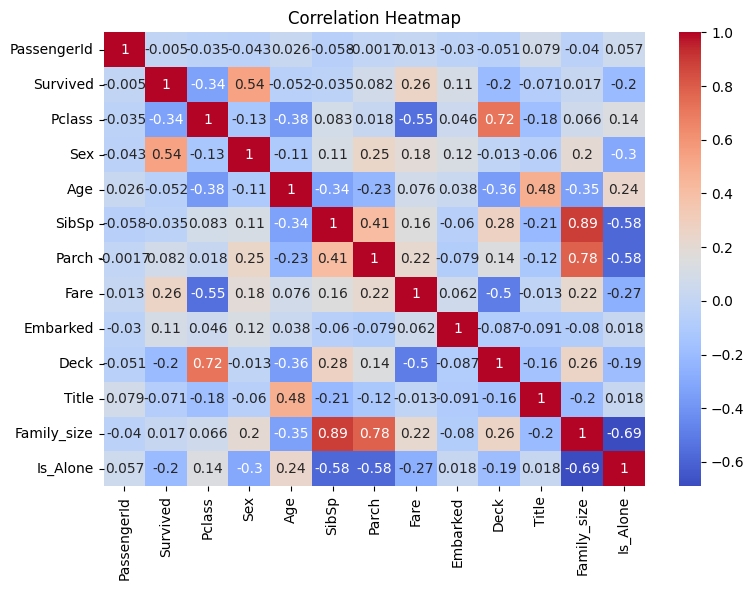

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6)) 
corrr = df.corr(numeric_only=True)  

sns.heatmap(corrr, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


<Axes: xlabel='Survived', ylabel='Fare'>

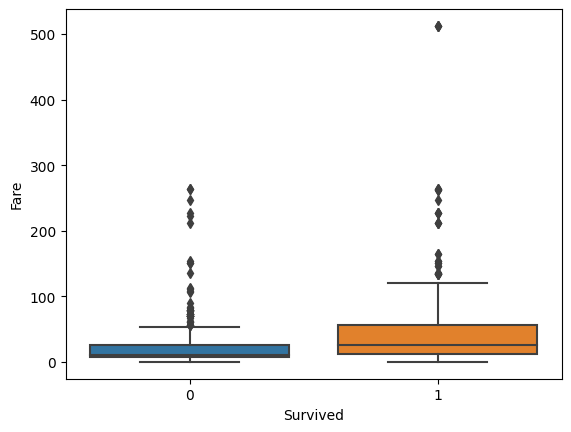

In [42]:
sns.boxplot(x='Survived',y='Fare',data=df)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB



In [44]:
df.drop(['Ticket','PassengerId'],axis=1,inplace=True)

In [45]:
df['Fare_range'] = pd.cut(df['Fare'],bins=[0, 7.91, 14.454, 31, 513],labels=['Low', 'Mid', 'High', 'Very High'])

In [46]:
df['Fare_range'].value_counts()

Fare_range
High         229
Very High    222
Mid          217
Low          208
Name: count, dtype: int64

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Family_size,Is_Alone,Fare_range
0,0,3,0,22.0,1,0,7.2500,0,5,2,1,0,Low
1,1,1,1,38.0,1,0,71.2833,1,2,3,1,0,Very High
2,1,3,1,26.0,0,0,7.9250,0,4,1,0,1,Mid
3,1,1,1,35.0,1,0,53.1000,0,2,3,1,0,Very High
4,0,3,0,35.0,0,0,8.0500,0,4,2,0,1,Mid


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


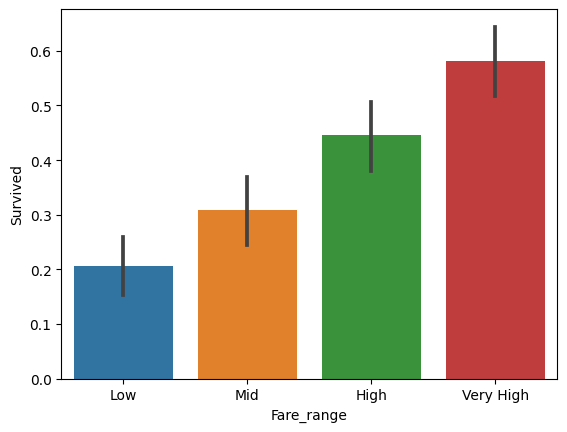

In [48]:
sns.barplot(x='Fare_range',y='Survived',data=df)
plt.show()

In [49]:
df['Fare_range'] = df['Fare_range'].astype('category').cat.codes

In [50]:
df['Fare_range'].value_counts()

Fare_range
 2    229
 3    222
 1    217
 0    208
-1     15
Name: count, dtype: int64

In [51]:
df['Age_range'] = pd.cut(df['Age'],bins=[0, 12, 18, 35, 60, 100],labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_range', ylabel='Survived'>

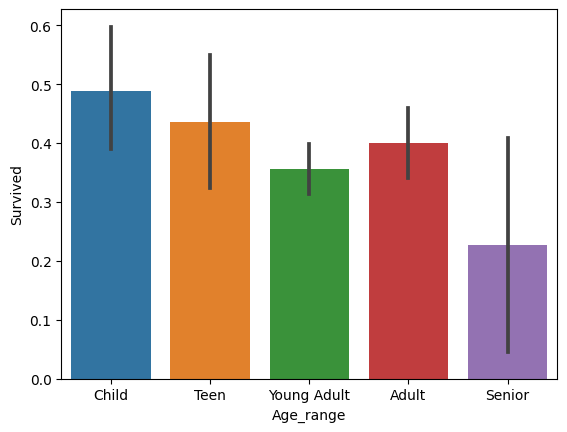

In [52]:
sns.barplot(x='Age_range',y='Survived',data=df)

In [53]:
df['Age_range'] = df['Age_range'].astype('category').cat.codes

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Family_size,Is_Alone,Fare_range,Age_range
0,0,3,0,22.0,1,0,7.2500,0,5,2,1,0,0,2
1,1,1,1,38.0,1,0,71.2833,1,2,3,1,0,3,3
2,1,3,1,26.0,0,0,7.9250,0,4,1,0,1,1,2
3,1,1,1,35.0,1,0,53.1000,0,2,3,1,0,3,2
4,0,3,0,35.0,0,0,8.0500,0,4,2,0,1,1,2


<Axes: xlabel='Fare_range', ylabel='Survived'>

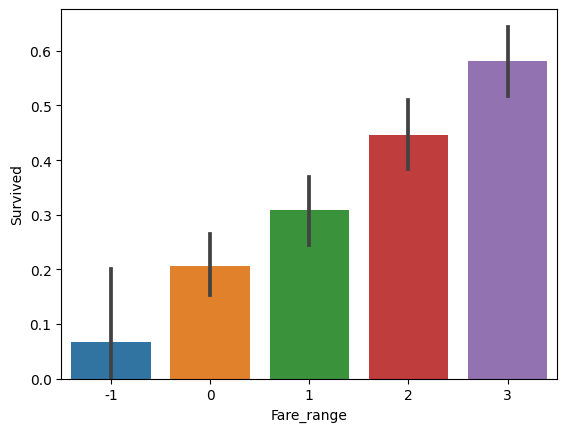

In [55]:
sns.barplot(x='Fare_range',y='Survived',data=df)

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Family_size,Is_Alone,Fare_range,Age_range
0,0,3,0,22.0,1,0,7.2500,0,5,2,1,0,0,2
1,1,1,1,38.0,1,0,71.2833,1,2,3,1,0,3,3
2,1,3,1,26.0,0,0,7.9250,0,4,1,0,1,1,2
3,1,1,1,35.0,1,0,53.1000,0,2,3,1,0,3,2
4,0,3,0,35.0,0,0,8.0500,0,4,2,0,1,1,2


In [57]:
df = df.drop(['Age', 'SibSp', 'Parch', 'Fare', 'Title','Embarked' ], axis=1)


In [58]:
X = df.drop('Survived',axis=1)
y = df['Survived'] 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
#trying different classiication models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

In [62]:
result=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    result.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

In [63]:
result_df = pd.DataFrame(result).sort_values(by='F1 Score', ascending=False)
print(result_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
2        Random Forest  0.843575   0.819444  0.797297  0.808219  0.883269
4              XGBoost  0.843575   0.828571  0.783784  0.805556  0.895367
1        Decision Tree  0.832402   0.814286  0.770270  0.791667  0.832690
0  Logistic Regression  0.810056   0.803030  0.716216  0.757143  0.882947
3                  SVM  0.798883   0.796875  0.689189  0.739130  0.861197
5          Naive Bayes  0.748603   0.679012  0.743243  0.709677  0.864672
